In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
orders = pd.read_csv("data/raw/olist_orders_dataset.csv.csv", parse_dates=["order_purchase_timestamp"])
payments = pd.read_csv("data/raw/olist_order_payments_dataset.csv.csv")


In [ ]:
merged = pd.merge(orders, payments, on="order_id")
merged["purchase_month"] = merged["order_purchase_timestamp"].dt.to_period("M").astype(str)


In [10]:
monthly_summary = merged.groupby("purchase_month").agg({
    "order_id": "nunique",         # total orders
    "payment_value": "sum"         # total revenue
}).reset_index()

monthly_summary.columns = ["Month", "Total Orders", "Total Revenue"]
monthly_summary["Total Revenue"] = monthly_summary["Total Revenue"].round(2)
monthly_summary.head()


,Month,Total Orders,Total Revenue
0,2016-09,3,252.24
1,2016-10,324,59090.48
2,2016-12,1,19.62
3,2017-01,800,138488.04
4,2017-02,1780,291908.01


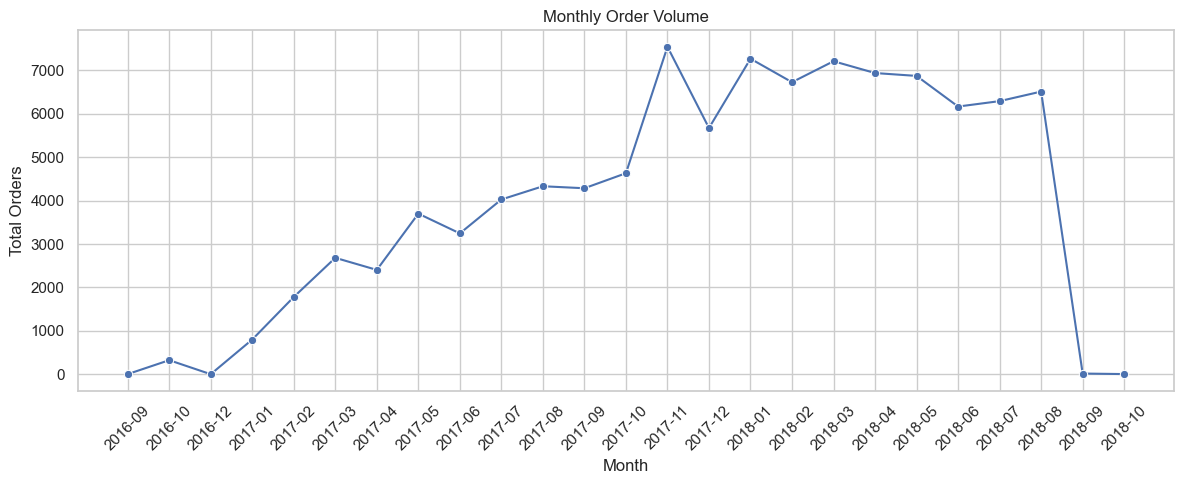

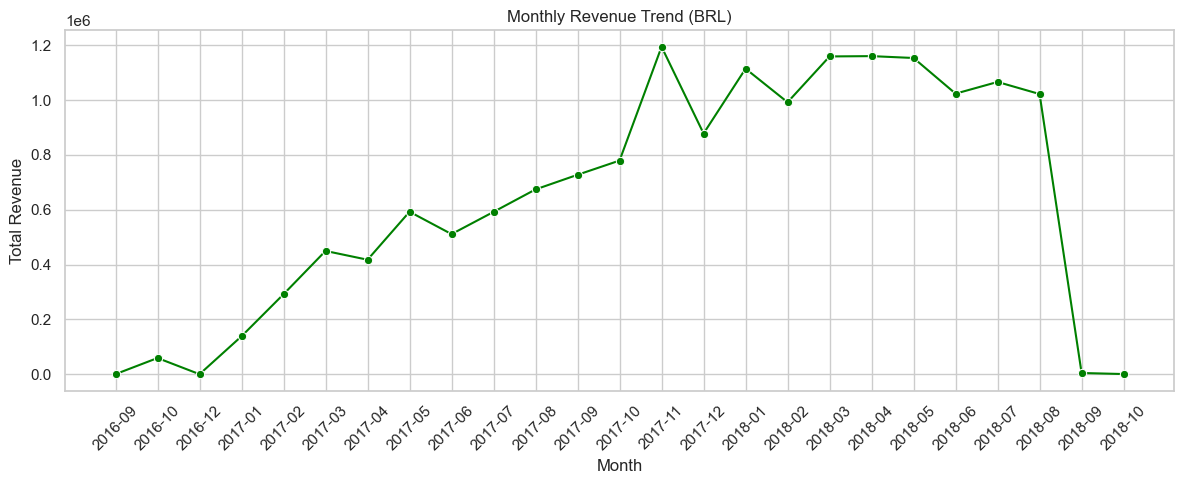

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Orders
plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_summary, x="Month", y="Total Orders", marker="o")
plt.title("Monthly Order Volume")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Revenue
plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_summary, x="Month", y="Total Revenue", marker="o", color="green")
plt.title("Monthly Revenue Trend (BRL)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
